In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.externals import joblib
import time

# Color Features

In [9]:
# img = cv2.imread('/Users/ryank/Documents/datasets/vehicles/GTI_MiddleClose/image0000.png')
img = cv2.imread('/hdd/datasets/vehicle_detection_data/vehicles/GTI_MiddleClose/image0000.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

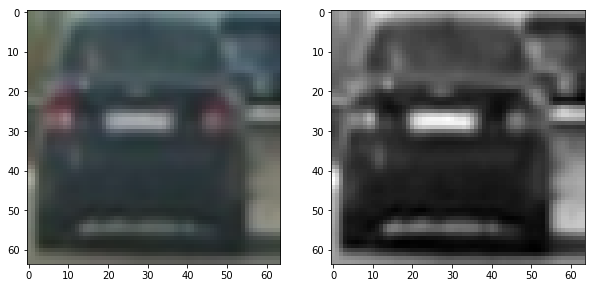

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(gray, cmap='gray')

In [17]:
# Define a function to compute color histogram features  
def color_hist(img, color_space='BGR', nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    if color_space != 'BGR':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    else: 
        feature_image = np.copy(img)         
        
    c1hist = np.histogram(feature_image[:,:,0], bins=nbins, range=bins_range)
    c2hist = np.histogram(feature_image[:,:,1], bins=nbins, range=bins_range)
    c3hist = np.histogram(feature_image[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((c1hist[0], c2hist[0], c3hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [37]:
color_features = color_hist(img, color_space='BGR')

In [38]:
len(color_features)

96

<Container object of 96 artists>

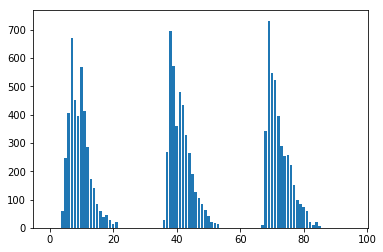

In [39]:
plt.bar(np.arange(len(color_features)), color_features)

In [40]:
# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
def bin_spatial(img, color_space='BGR', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'BGR':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

In [41]:
spatial_features = bin_spatial(img)

In [42]:
len(spatial_features)

3072

<Container object of 3072 artists>

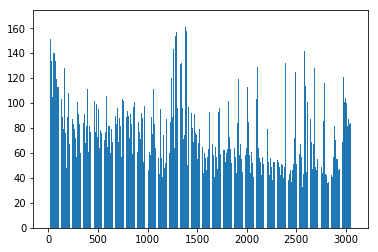

In [43]:
plt.bar(np.arange(len(spatial_features)), spatial_features)

# Gradient Features

In [134]:
# img = cv2.imread('/Users/ryank/Documents/datasets/vehicles/GTI_MiddleClose/image0000.png')
img = cv2.imread('/hdd/datasets/vehicle_detection_data/vehicles/GTI_MiddleClose/image0000.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

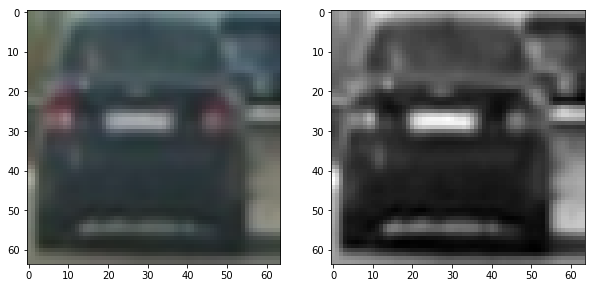

In [135]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(gray, cmap='gray')

In [136]:
pix_per_cell = 8
cell_per_block = 2
orient = 9

hog_features, hog_image = hog(gray, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

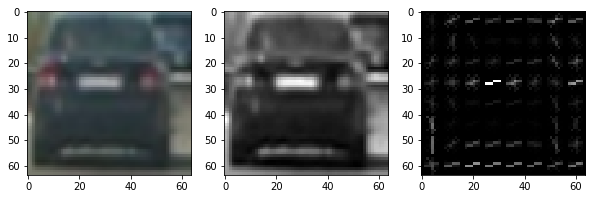

In [137]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img[:,:,::-1])
plt.subplot(132)
plt.imshow(gray, cmap='gray')
plt.subplot(133)
plt.imshow(hog_image, cmap='gray')

In [146]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=True,
                     feature_vec=True):
                         
    """
    Function accepts params and returns HOG features (optionally flattened) and an optional matrix for 
    visualization. Features will always be the first return (flattened if feature_vector= True).
    A visualization matrix will be the second return if visualize = True.
    """
    
    return_list = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys', transform_sqrt=False, 
                                  visualise= vis, feature_vector= feature_vec)
    
    # name returns explicitly
    hog_features = return_list[0]
    if vis:
        hog_image = return_list[1]
        return hog_features, hog_image
    else:
        return hog_features

In [156]:
def get_hog_features_only(img, orient, pix_per_cell, cell_per_block, feature_vec=True):
                         
    """
    Function accepts params and returns HOG features (optionally flattened) and an optional matrix for 
    visualization. Features will always be the first return (flattened if feature_vector= True).
    A visualization matrix will be the second return if visualize = True.
    """
    
    hog_features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys', transform_sqrt=False, 
                                  visualise= False, feature_vector= feature_vec)
    
    return hog_features

In [158]:
pix_per_cell = 8
cell_per_block = 2
orient = 9

# hog_features, hog_image = get_hog_features(gray, orient, pix_per_cell, cell_per_block)
hog_features = get_hog_features_only(gray, orient, pix_per_cell, cell_per_block)

In [159]:
hog_features.shape

(1764,)

<Container object of 1764 artists>

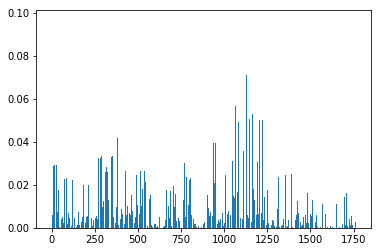

In [160]:
plt.bar(np.arange(len(hog_features)), hog_features)

# Vehicle / Non-vehicle Training Data

In [53]:
# vehicle_glob = glob.glob('/Users/ryank/Documents/datasets/vehicles/**/*.png')
# non_vehicle_glob = glob.glob('/Users/ryank/Documents/datasets/non-vehicles/**/*.png')

vehicle_glob = glob.glob('/hdd/datasets/vehicle_detection_data/vehicles/**/*.png')
non_vehicle_glob = glob.glob('/hdd/datasets/vehicle_detection_data/non-vehicles/**/*.png')

In [54]:
print(len(vehicle_glob))
print(len(non_vehicle_glob))

8792
8968


In [55]:
# read vehicle images
vehicle_imgs = []
for f in vehicle_glob:
    vehicle_imgs.append(cv2.imread(f))
vehicle_imgs = np.array(vehicle_imgs)

print(vehicle_imgs.shape)

(8792, 64, 64, 3)


In [57]:
pix_per_cell = 8
cell_per_block = 2
orient = 9

# create vehicle gradient features
vehicle_gradient_features = []
for img in vehicle_imgs:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_features, _ = get_hog_features(gray, orient, pix_per_cell, cell_per_block)
    vehicle_gradient_features.append(gradient_features)
vehicle_gradient_features = np.array(vehicle_gradient_features)

# # create vehicle spatial features
# vehicle_spatial_features = []
# for img in vehicle_imgs:
#     spatial_features = bin_spatial(img)
#     vehicle_spatial_features.append(spatial_features)
# vehicle_spatial_features = np.array(vehicle_spatial_features)
    
# create vehicle color features
vehicle_bgr_features = []
for img in vehicle_imgs:
    color_features = color_hist(img, color_space='BGR')
    vehicle_bgr_features.append(color_features)
vehicle_bgr_features = np.array(vehicle_bgr_features)

vehicle_hsv_features = []
for img in vehicle_imgs:
    color_features = color_hist(img, color_space='HSV')
    vehicle_hsv_features.append(color_features)
vehicle_hsv_features = np.array(vehicle_hsv_features)

vehicle_luv_features = []
for img in vehicle_imgs:
    color_features = color_hist(img, color_space='LUV')
    vehicle_luv_features.append(color_features)
vehicle_luv_features = np.array(vehicle_luv_features)

vehicle_ycrcb_features = []
for img in vehicle_imgs:
    color_features = color_hist(img, color_space='YCrCb')
    vehicle_ycrcb_features.append(color_features)
vehicle_ycrcb_features = np.array(vehicle_ycrcb_features)

In [58]:
vehicle_y = np.array([1] * len(vehicle_imgs))

In [59]:
# read non-vehicle images
non_vehicle_imgs = []
for f in non_vehicle_glob:
    non_vehicle_imgs.append(cv2.imread(f))
non_vehicle_imgs = np.array(non_vehicle_imgs)

print(non_vehicle_imgs.shape)

(8968, 64, 64, 3)


In [60]:
pix_per_cell = 8
cell_per_block = 2
orient = 9

# create non-vehicle gradient features
non_vehicle_gradient_features = []
for img in non_vehicle_imgs:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_features, _ = get_hog_features(gray, orient, pix_per_cell, cell_per_block)
    non_vehicle_gradient_features.append(gradient_features)
non_vehicle_gradient_features = np.array(non_vehicle_gradient_features)
    
# # create non-vehicle spatial features
# non_vehicle_spatial_features = []
# for img in non_vehicle_imgs:
#     spatial_features = bin_spatial(img)
#     non_vehicle_spatial_features.append(spatial_features)
# non_vehicle_spatial_features = np.array(non_vehicle_spatial_features)
    
# create non-vehicle color features
non_vehicle_bgr_features = []
for img in non_vehicle_imgs:
    color_features = color_hist(img, color_space='BGR')
    non_vehicle_bgr_features.append(color_features)
non_vehicle_bgr_features = np.array(non_vehicle_bgr_features)

non_vehicle_hsv_features = []
for img in non_vehicle_imgs:
    color_features = color_hist(img, color_space='HSV')
    non_vehicle_hsv_features.append(color_features)
non_vehicle_hsv_features = np.array(non_vehicle_hsv_features)

non_vehicle_luv_features = []
for img in non_vehicle_imgs:
    color_features = color_hist(img, color_space='LUV')
    non_vehicle_luv_features.append(color_features)
non_vehicle_luv_features = np.array(non_vehicle_luv_features)

non_vehicle_ycrcb_features = []
for img in non_vehicle_imgs:
    color_features = color_hist(img, color_space='YCrCb')
    non_vehicle_ycrcb_features.append(color_features)
non_vehicle_ycrcb_features = np.array(non_vehicle_ycrcb_features)

In [61]:
non_vehicle_y = np.array([0] * len(non_vehicle_imgs))

# Split

In [62]:
VGF_train, VGF_test, v_y_train, v_y_test = train_test_split(vehicle_gradient_features, vehicle_y, test_size=0.2, random_state=42)
VbgrF_train, VbgrF_test, v_y_train, v_y_test = train_test_split(vehicle_bgr_features, vehicle_y, test_size=0.2, random_state=42)
VhsvF_train, VhsvF_test, v_y_train, v_y_test = train_test_split(vehicle_hsv_features, vehicle_y, test_size=0.2, random_state=42)
VluvF_train, VluvF_test, v_y_train, v_y_test = train_test_split(vehicle_luv_features, vehicle_y, test_size=0.2, random_state=42)
VycrcbF_train, VycrcbF_test, v_y_train, v_y_test = train_test_split(vehicle_ycrcb_features, vehicle_y, test_size=0.2, random_state=42)

NVGF_train, NVGF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_gradient_features, non_vehicle_y, test_size=0.2, random_state=42)
NVbgrF_train, NVbgrF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_bgr_features, non_vehicle_y, test_size=0.2, random_state=42)
NVhsvF_train, NVhsvF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_hsv_features, non_vehicle_y, test_size=0.2, random_state=42)
NVluvF_train, NVluvF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_luv_features, non_vehicle_y, test_size=0.2, random_state=42)
NVycrcbF_train, NVycrcbF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_ycrcb_features, non_vehicle_y, test_size=0.2, random_state=42)

In [63]:
GF_train = np.concatenate([VGF_train, NVGF_train])
bgrF_train = np.concatenate([VbgrF_train, NVbgrF_train])
hsvF_train = np.concatenate([VhsvF_train, NVhsvF_train])
luvF_train = np.concatenate([VluvF_train, NVluvF_train])
ycrcbF_train = np.concatenate([VycrcbF_train, NVycrcbF_train])

GF_test = np.concatenate([VGF_test, NVGF_test])
bgrF_test = np.concatenate([VbgrF_test, NVbgrF_test])
hsvF_test = np.concatenate([VhsvF_test, NVhsvF_test])
luvF_test = np.concatenate([VluvF_test, NVluvF_test])
ycrcbF_test = np.concatenate([VycrcbF_test, NVycrcbF_test])

y_train = np.concatenate([v_y_train, nv_y_train])
y_test = np.concatenate([v_y_test, nv_y_test])

In [64]:
# VGF_train, VGF_test, v_y_train, v_y_test = train_test_split(vehicle_gradient_features, vehicle_y, test_size=0.2, random_state=42)
# # VSF_train, VSF_test, v_y_train, v_y_test = train_test_split(vehicle_spatial_features, vehicle_y, test_size=0.2, random_state=42)
# VCF_train, VCF_test, v_y_train, v_y_test = train_test_split(vehicle_color_features, vehicle_y, test_size=0.2, random_state=42)

# NVGF_train, NVGF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_gradient_features, non_vehicle_y, test_size=0.2, random_state=42)
# # NVSF_train, NVSF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_spatial_features, non_vehicle_y, test_size=0.2, random_state=42)
# NVCF_train, NVCF_test, nv_y_train, nv_y_test = train_test_split(non_vehicle_color_features, non_vehicle_y, test_size=0.2, random_state=42)

In [65]:
# GF_train = np.concatenate([VGF_train, NVGF_train])
# # SF_train = np.concatenate([VSF_train, NVSF_train])
# CF_train = np.concatenate([VCF_train, NVCF_train])

# GF_test = np.concatenate([VGF_test, NVGF_test])
# # SF_test = np.concatenate([VSF_test, NVSF_test])
# CF_test = np.concatenate([VCF_test, NVCF_test])

# y_train = np.concatenate([v_y_train, nv_y_train])
# y_test = np.concatenate([v_y_test, nv_y_test])

# Scale

In [67]:
gradient_scaler = StandardScaler()
bgr_scaler = StandardScaler()
hsv_scaler = StandardScaler()
luv_scaler = StandardScaler()
ycrcb_scaler = StandardScaler()

GF_train_scaled = gradient_scaler.fit_transform(GF_train)
bgrF_train_scaled = bgr_scaler.fit_transform(bgrF_train)
hsvF_train_scaled = hsv_scaler.fit_transform(hsvF_train)
luvF_train_scaled = luv_scaler.fit_transform(luvF_train)
ycrcbF_train_scaled = ycrcb_scaler.fit_transform(ycrcbF_train)

GF_test_scaled = gradient_scaler.transform(GF_test)
bgrF_test_scaled = bgr_scaler.transform(bgrF_test)
hsvF_test_scaled = hsv_scaler.transform(hsvF_test)
luvF_test_scaled = luv_scaler.transform(luvF_test)
ycrcbF_test_scaled = ycrcb_scaler.transform(ycrcbF_test)

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [68]:
# gradient_scaler = StandardScaler()
# # spatial_scaler = StandardScaler()
# color_scaler = StandardScaler()

# GF_train_scaled = gradient_scaler.fit_transform(GF_train)
# # SF_train_scaled = spatial_scaler.fit_transform(SF_train)
# CF_train_scaled = color_scaler.fit_transform(CF_train)

# GF_test_scaled = gradient_scaler.transform(GF_test)
# # SF_test_scaled = spatial_scaler.transform(SF_test)
# CF_test_scaled = color_scaler.transform(CF_test)

In [69]:
X_train = np.concatenate([GF_train_scaled, bgrF_train_scaled, hsvF_train_scaled, luvF_train_scaled, ycrcbF_train_scaled], axis=1)
X_test = np.concatenate([GF_test_scaled, bgrF_test_scaled, hsvF_test_scaled, luvF_test_scaled, ycrcbF_test_scaled], axis=1)

In [70]:
# # X_train = np.concatenate([GF_train_scaled, SF_train_scaled, CF_train_scaled], axis=1)
# # X_test = np.concatenate([GF_test_scaled, SF_test_scaled, CF_test_scaled], axis=1)

# X_train = np.concatenate([GF_train_scaled, CF_train_scaled], axis=1)
# X_test = np.concatenate([GF_test_scaled, CF_test_scaled], axis=1)

In [71]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14207, 2148) (14207,)
(3553, 2148) (3553,)


# SVM Classifier

In [72]:
# # tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
# #                      'C': [1, 10, 100, 1000]},
# #                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


# scores = ['precision', 'recall']

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()

#     clf = GridSearchCV(SVC(), tuned_parameters, cv=4,
#                        scoring='%s_macro' % score)
#     clf.fit(X_train, y_train)

#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
#     print()

#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred))
#     print()

In [73]:
# from sklearn.ensemble import RandomForestClassifier

# # build a classifier
# clf = RandomForestClassifier(n_estimators=100)

# # Utility function to report best scores
# def report(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#                   results['mean_test_score'][candidate],
#                   results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")

# # use a full grid over all parameters
# param_grid = {"max_depth": [3, 5, None],
#               "max_features": [1, 3, 10],}
# #               "min_samples_split": [2, 3, 10],
# #               "min_samples_leaf": [1, 3, 10],
# #               "bootstrap": [True, False],
# #               "criterion": ["gini", "entropy"]}

# # run grid search
# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4)
# grid_search.fit(X_train, y_train)

# report(grid_search.cv_results_)

In [75]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [74]:
svc = LinearSVC()

param_grid = {"penalty": ["l1","l2"],
              "loss": ["squared_hinge"],
              "dual": [False],
              "C": [0.01, 0.1, 1.0, 10.0]}
              
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)

report(grid_search.cv_results_)

NameError: name 'report' is not defined

In [76]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.990 (std: 0.002)
Parameters: {'C': 0.1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.988 (std: 0.002)
Parameters: {'C': 0.01, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.988 (std: 0.001)
Parameters: {'C': 1.0, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}



In [82]:
t = time.time()
svc = LinearSVC(penalty='l1', dual=False, C=0.1)
svc.fit(X_train, y_train)
print(time.time() - t)

12.239423513412476


In [83]:
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

Test Accuracy of SVC =  0.9868


In [85]:
joblib.dump(svc, 'model.pkl') 
# svc = joblib.load('model.pkl') 

['model.pkl']

In [86]:
clf = joblib.load('model.pkl')

# Sliding Windows

In [87]:
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list


In [128]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2):    
#     #1) Define an empty list to receive features
#     img_features = []
#     #2) Apply color conversion if other than 'RGB'
#     if color_space != 'RGB':
#         if color_space == 'HSV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#         elif color_space == 'LUV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
#         elif color_space == 'HLS':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#         elif color_space == 'YUV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#         elif color_space == 'YCrCb':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
#     else: feature_image = np.copy(img)      
#     #3) Compute spatial features if flag is set
#     if spatial_feat == True:
#         spatial_features = bin_spatial(feature_image, size=spatial_size)
#         #4) Append features to list
#         img_features.append(spatial_features)
#     #5) Compute histogram features if flag is set
#     if hist_feat == True:
#         hist_features = color_hist(feature_image, nbins=hist_bins)
#         #6) Append features to list
#         img_features.append(hist_features)
#     #7) Compute HOG features if flag is set
#     if hog_feat == True:
#         if hog_channel == 'ALL':
#             hog_features = []
#             for channel in range(feature_image.shape[2]):
#                 hog_features.extend(get_hog_features(feature_image[:,:,channel], 
#                                     orient, pix_per_cell, cell_per_block, 
#                                     vis=False, feature_vec=True))      
#         else:
#             hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                         pix_per_cell, cell_per_block, vis=False, feature_vec=True)
#         #8) Append features to list
#         img_features.append(hog_features)

#     #9) Return concatenated array of features
#     return np.concatenate(img_features)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gradient_features, _ = get_hog_features(gray, orient, pix_per_cell, cell_per_block)
    bgr_features = color_hist(img, color_space='BGR')
    hsv_features = color_hist(img, color_space='HSV')
    luv_features = color_hist(img, color_space='LUV')
    ycrcb_features = color_hist(img, color_space='YCrCb')

    gradient_scaled = gradient_scaler.transform(gradient_features.reshape(1,-1))
    bgr_scaled = bgr_scaler.transform(bgr_features.reshape(1,-1))
    hsv_scaled = hsv_scaler.transform(hsv_features.reshape(1,-1))
    luv_scaled = luv_scaler.transform(luv_features.reshape(1,-1))
    ycrcb_scaled = ycrcb_scaler.transform(ycrcb_features.reshape(1,-1))

    return np.concatenate([gradient_scaled, bgr_scaled, hsv_scaled, luv_scaled, ycrcb_scaled], axis=1)

In [129]:
# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block)
        #6) Predict using your classifier
        prediction = clf.predict(features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    

In [130]:
# A function to show an image
def show_img(img):
    if len(img.shape)==3: #Color BGR image
        plt.figure()
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else: # Grayscale image
        plt.figure()
        plt.imshow(img, cmap='gray')

In [132]:
# Define a function to draw bounding boxes on an image
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    imcopy = np.copy(img) # Make a copy of the image
    for bbox in bboxes: # Iterate through the bounding boxes
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    return imcopy

/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


32.19 Seconds to process test images


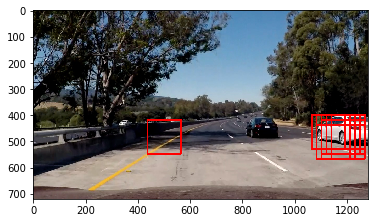

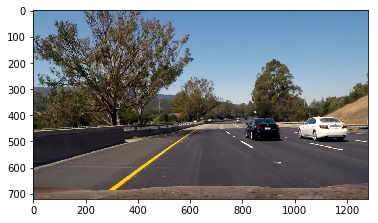

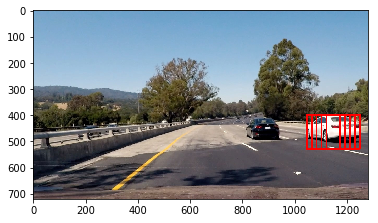

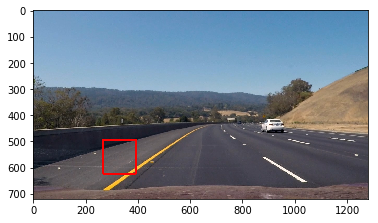

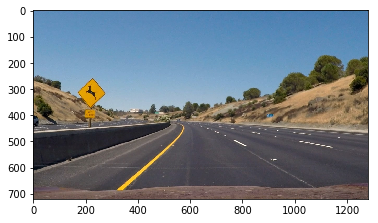

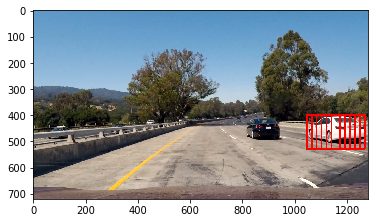

In [133]:
t=time.time() # Start time
for image_p in glob.glob('test_images/test*.jpg'):
    image = cv2.imread(image_p)
    draw_image = np.copy(image)
    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[400, 640], 
                    xy_window=(128, 128), xy_overlap=(0.85, 0.85))
    hot_windows = []
    hot_windows += (search_windows(image, windows, svc))                       
    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
    show_img(window_img)
print(round(time.time()-t, 2), 'Seconds to process test images')